# MULTICLASS CLASSIFICATION FOR  MUSIC GENRES


This project was carried out as a part of an academic course entitled by “Analytical Service Development”. The objective of this project was to predict song genre followed by Fourier analysis. In this project, the data was collected from the Bangladeshi music market over the internet, personal collection, and public announcement. Total amount of the collected data was 10GB. In the analysis part, both Machine Learning (ML) and Deep Learning (DL) were used for the prediction of the genre and about 61% accuracy was attained through these analyses.  

In [1]:
# packages import 

%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
# data set
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['Adhunik', 'band', 'Deshhottobodhok', 'Nazrul', 'Polligiti', 'Rabindro','Rock']
data_set[:5]

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,0.962721,-0.601874,0.983954,-0.612836,-0.742546,-0.755910,0.812723,-0.695148,0.966339,-0.617198,...,-0.757113,0.259305,-0.702903,0.161542,-0.675466,0.158719,-0.751043,0.002768,-0.684250,Adhunik
1,0.489787,0.331832,0.360995,-0.490174,-0.545470,-0.576120,0.761158,-0.669701,0.599201,-0.543727,...,-0.611994,0.076543,-0.053326,-0.124967,-0.717158,0.013013,-0.719873,-0.348223,-0.443437,Adhunik
2,0.419249,0.220103,0.293166,-0.337192,-0.531619,-0.541354,0.692485,-0.615743,0.503967,-0.338720,...,-0.738532,0.195369,-0.694261,-0.100478,-0.559201,-0.002678,-0.656888,-0.303428,-0.745899,Adhunik
3,0.707558,-0.150335,0.794879,-0.107344,-0.664695,-0.577673,0.674896,-0.231656,0.789003,-0.054182,...,-0.894098,0.266507,-0.880440,-0.095706,-0.854582,0.066147,-0.832387,-0.291351,-0.692726,Adhunik
4,0.055773,-0.285244,0.285656,-0.014140,-0.659572,-0.459264,0.739968,-0.454382,0.548645,-0.181314,...,-0.775438,0.120252,-0.473478,-0.073089,-0.528988,0.053426,-0.763586,-0.276285,-0.808457,Adhunik


In [3]:
# data splitting

from sklearn.model_selection import train_test_split
number_of_rows,number_of_cols = data_set.shape
data_set_values=numpy.array(data_set)
train, test = train_test_split(data_set_values, test_size = 0.3,random_state=42,
                              stratify=data_set_values[:,number_of_cols-1])
train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]
test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (336, 37)
Test data size: (144, 37)


In [4]:
# confusion matrix 

def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

## Application of KNN algorithm and its performance analysis

Max Accuracy is 0.618 on test dataset with 5 neighbors.

Test score: 0.618


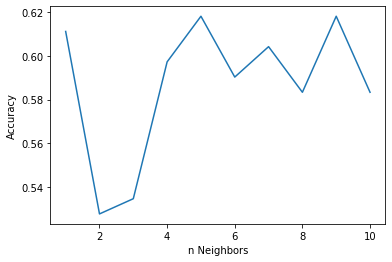

In [5]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)

print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  



---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Polligiti' 'Polligiti' 'Polligiti' 'Polligiti' 'Band' 'Nazrul' 'Nazrul'
 'Polligiti' 'Band' 'Polligiti' 'Deshhottobodhok' 'Polligiti' 'Band'
 'Adhunik' 'Polligiti' 'Polligiti' 'Rock' 'Rabindro' 'Polligiti'
 'Polligiti' 'Rabindro' 'Nazrul' 'Polligiti' 'Nazrul' 'Adhunik'
 'Polligiti' 'Rabindro' 'Polligiti' 'Nazrul' 'Rock' 'Polligiti' 'Nazrul'
 'Deshhottobodhok' 'Polligiti' 'Band' 'Polligiti' 'Polligiti'
 'Deshhottobodhok' 'Rabindro' 'Polligiti' 'Nazrul' 'Polligiti' 'Polligiti'
 'Polligiti' 'Adhunik' 'Band' 'Band' 'Nazrul' 'Adhunik' 'Band' 'Adhunik'
 'Polligiti' 'Nazrul' 'Polligiti' 'Rock' 'Rock' 'Nazrul' 'Band'
 'Polligiti' 'Deshhottobodhok' 'Nazrul' 'Rabindro' 'Nazrul' 'Polligiti'
 'Polligiti' 'Polligiti' 'Polligiti' 'Rabindro' 'Adhunik'
 'Deshhottobodhok' 'Deshhottobodhok' 'Deshhottobodhok' 'Polligiti'
 'Rabindro' 'Rock' 'Nazrul' 'Adhunik' 'Nazrul' 'Polligiti' 'Adhunik'
 'Polligiti' 'Band' '

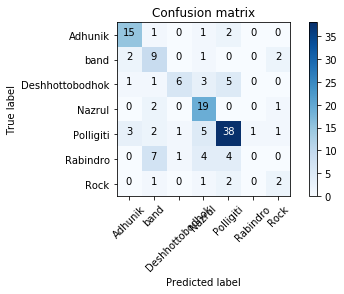

In [6]:
plot_cnf(knn,test_x,test_y,GENRES)

## Application of Random Forest algorithm and its performance analysis

Max Accuracy is 0.611 on test dataset with 16 estimators.

Test score: 0.611


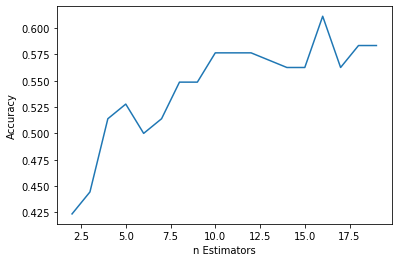

In [7]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)

print("Test score: {:.3f}".format(forest.score(test_x,test_y)))



---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Polligiti' 'Polligiti' 'Polligiti' 'Polligiti' 'Band' 'Nazrul' 'Nazrul'
 'Polligiti' 'Band' 'Polligiti' 'Deshhottobodhok' 'Polligiti' 'Band'
 'Adhunik' 'Polligiti' 'Polligiti' 'Rock' 'Rabindro' 'Polligiti'
 'Polligiti' 'Rabindro' 'Nazrul' 'Polligiti' 'Nazrul' 'Adhunik'
 'Polligiti' 'Rabindro' 'Polligiti' 'Nazrul' 'Rock' 'Polligiti' 'Nazrul'
 'Deshhottobodhok' 'Polligiti' 'Band' 'Polligiti' 'Polligiti'
 'Deshhottobodhok' 'Rabindro' 'Polligiti' 'Nazrul' 'Polligiti' 'Polligiti'
 'Polligiti' 'Adhunik' 'Band' 'Band' 'Nazrul' 'Adhunik' 'Band' 'Adhunik'
 'Polligiti' 'Nazrul' 'Polligiti' 'Rock' 'Rock' 'Nazrul' 'Band'
 'Polligiti' 'Deshhottobodhok' 'Nazrul' 'Rabindro' 'Nazrul' 'Polligiti'
 'Polligiti' 'Polligiti' 'Polligiti' 'Rabindro' 'Adhunik'
 'Deshhottobodhok' 'Deshhottobodhok' 'Deshhottobodhok' 'Polligiti'
 'Rabindro' 'Rock' 'Nazrul' 'Adhunik' 'Nazrul' 'Polligiti' 'Adhunik'
 'Polligiti' 'Band' '

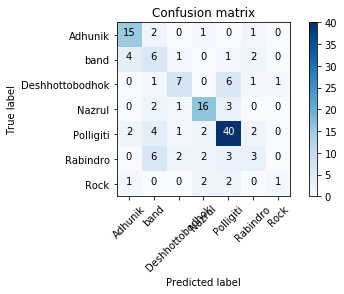

In [8]:
plot_cnf(forest,test_x,test_y,GENRES)

## Application of SVM algorithm and its performance analysis

In [9]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)

print("Test score: {:.3f}".format(svm.score(test_x,test_y)))



Test score: 0.611


---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Polligiti' 'Polligiti' 'Polligiti' 'Polligiti' 'Band' 'Nazrul' 'Nazrul'
 'Polligiti' 'Band' 'Polligiti' 'Deshhottobodhok' 'Polligiti' 'Band'
 'Adhunik' 'Polligiti' 'Polligiti' 'Rock' 'Rabindro' 'Polligiti'
 'Polligiti' 'Rabindro' 'Nazrul' 'Polligiti' 'Nazrul' 'Adhunik'
 'Polligiti' 'Rabindro' 'Polligiti' 'Nazrul' 'Rock' 'Polligiti' 'Nazrul'
 'Deshhottobodhok' 'Polligiti' 'Band' 'Polligiti' 'Polligiti'
 'Deshhottobodhok' 'Rabindro' 'Polligiti' 'Nazrul' 'Polligiti' 'Polligiti'
 'Polligiti' 'Adhunik' 'Band' 'Band' 'Nazrul' 'Adhunik' 'Band' 'Adhunik'
 'Polligiti' 'Nazrul' 'Polligiti' 'Rock' 'Rock' 'Nazrul' 'Band'
 'Polligiti' 'Deshhottobodhok' 'Nazrul' 'Rabindro' 'Nazrul' 'Polligiti'
 'Polligiti' 'Polligiti' 'Polligiti' 'Rabindro' 'Adhunik'
 'Deshhottobodhok' 'Deshhottobodhok' 'Deshhottobodhok' 'Polligiti'
 'Rabindro' 'Rock' 'Nazrul' 'Adhunik' 'Nazrul' 'Polligiti' 'Adhunik'
 'Polligiti' 'Band' '

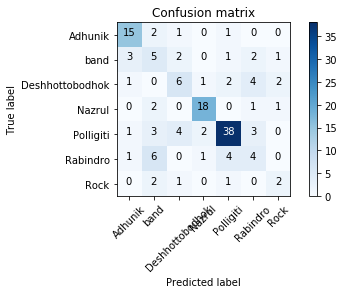

In [10]:
plot_cnf(svm,test_x,test_y,GENRES)

In [11]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)

print("Test score: {:.3f}".format(neural.score(test_x,test_y)))



Test score: 0.569


C:\Users\minds\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['Polligiti' 'Polligiti' 'Polligiti' 'Polligiti' 'Band' 'Nazrul' 'Nazrul'
 'Polligiti' 'Band' 'Polligiti' 'Deshhottobodhok' 'Polligiti' 'Band'
 'Adhunik' 'Polligiti' 'Polligiti' 'Rock' 'Rabindro' 'Polligiti'
 'Polligiti' 'Rabindro' 'Nazrul' 'Polligiti' 'Nazrul' 'Adhunik'
 'Polligiti' 'Rabindro' 'Polligiti' 'Nazrul' 'Rock' 'Polligiti' 'Nazrul'
 'Deshhottobodhok' 'Polligiti' 'Band' 'Polligiti' 'Polligiti'
 'Deshhottobodhok' 'Rabindro' 'Polligiti' 'Nazrul' 'Polligiti' 'Polligiti'
 'Polligiti' 'Adhunik' 'Band' 'Band' 'Nazrul' 'Adhunik' 'Band' 'Adhunik'
 'Polligiti' 'Nazrul' 'Polligiti' 'Rock' 'Rock' 'Nazrul' 'Band'
 'Polligiti' 'Deshhottobodhok' 'Nazrul' 'Rabindro' 'Nazrul' 'Polligiti'
 'Polligiti' 'Polligiti' 'Polligiti' 'Rabindro' 'Adhunik'
 'Deshhottobodhok' 'Deshhottobodhok' 'Deshhottobodhok' 'Polligiti'
 'Rabindro' 'Rock' 'Nazrul' 'Adhunik' 'Nazrul' 'Polligiti' 'Adhunik'
 'Polligiti' 'Band' '

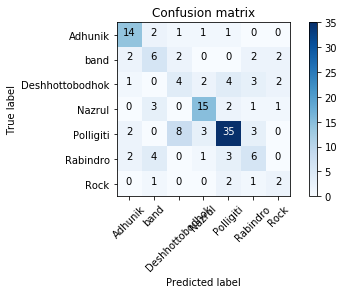

In [12]:
plot_cnf(neural,test_x,test_y,GENRES)

# Deep learning

In [13]:
data=data_set
# Dropping unneccesary columns
data = data.drop(['genre'],axis=1)
data.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13
0,0.962721,-0.601874,0.983954,-0.612836,-0.742546,-0.755910,0.812723,-0.695148,0.966339,-0.617198,...,0.072827,-0.757113,0.259305,-0.702903,0.161542,-0.675466,0.158719,-0.751043,0.002768,-0.684250
1,0.489787,0.331832,0.360995,-0.490174,-0.545470,-0.576120,0.761158,-0.669701,0.599201,-0.543727,...,-0.196826,-0.611994,0.076543,-0.053326,-0.124967,-0.717158,0.013013,-0.719873,-0.348223,-0.443437
2,0.419249,0.220103,0.293166,-0.337192,-0.531619,-0.541354,0.692485,-0.615743,0.503967,-0.338720,...,-0.095695,-0.738532,0.195369,-0.694261,-0.100478,-0.559201,-0.002678,-0.656888,-0.303428,-0.745899
3,0.707558,-0.150335,0.794879,-0.107344,-0.664695,-0.577673,0.674896,-0.231656,0.789003,-0.054182,...,-0.085974,-0.894098,0.266507,-0.880440,-0.095706,-0.854582,0.066147,-0.832387,-0.291351,-0.692726
4,0.055773,-0.285244,0.285656,-0.014140,-0.659572,-0.459264,0.739968,-0.454382,0.548645,-0.181314,...,-0.106465,-0.775438,0.120252,-0.473478,-0.073089,-0.528988,0.053426,-0.763586,-0.276285,-0.808457


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
genre_list = data_set.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
X = np.array(data.iloc[:, :-1], dtype = float)



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)



Instructions for updating:
Use tf.cast instead.
Epoch 1/20
384/384 [==============================] - 2s 6ms/step - loss: 2.2747 - acc: 0.1172
Epoch 2/20
384/384 [==============================] - 0s 26us/step - loss: 2.1304 - acc: 0.3177
Epoch 3/20
384/384 [==============================] - 0s 26us/step - loss: 1.9929 - acc: 0.4089
Epoch 4/20
384/384 [==============================] - 0s 29us/step - loss: 1.8401 - acc: 0.4271
Epoch 5/20
384/384 [==============================] - 0s 31us/step - loss: 1.7019 - acc: 0.4297
Epoch 6/20
384/384 [==============================] - 0s 36us/step - loss: 1.5955 - acc: 0.4635
Epoch 7/20
384/384 [==============================] - 0s 31us/step - loss: 1.4975 - acc: 0.4948
Epoch 8/20
384/384 [==============================] - 0s 34us/step - loss: 1.4059 - acc: 0.5391
Epoch 9/20
384/384 [==============================] - 0s 34us/step - loss: 1.3239 - acc: 0.5781
Epoch 10/20
384/384 [==============================] - 0s 29us/step - loss: 1.2621 - acc:

In [19]:
test_loss, test_acc = model.evaluate(X_test,y_test)

96/96 [==============================] - 0s 426us/step


In [20]:
print('test_acc: ',test_acc)

test_acc:  0.59375


In [21]:
predictions = model.predict(X_test)

In [22]:
predictions[0].shape

(10,)

In [23]:
np.sum(predictions[0])

0.99999994